# Task-2 Movie Rating Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Importing Movie Dataset
movies=pd.read_csv("Dataset/movies.dat",sep="::",engine="python",encoding="latin1")

movies.columns=["MovieId","Title","Category"]
movies.head()

MovieId                               Title                      Category
0        2                      Jumanji (1995)  Adventure|Children's|Fantasy
1        3             Grumpier Old Men (1995)                Comedy|Romance
2        4            Waiting to Exhale (1995)                  Comedy|Drama
3        5  Father of the Bride Part II (1995)                        Comedy
4        6                         Heat (1995)         Action|Crime|Thriller

In [3]:
# Importing Rating Dataset
ratings= pd.read_csv("Dataset/ratings.dat",sep="::",engine="python",encoding="latin1")
ratings.columns=["UserId","MovieId","Rating","Timestamp"]
ratings.head()

UserId  MovieId  Rating  Timestamp
0       1      661       3  978302109
1       1      914       3  978301968
2       1     3408       4  978300275
3       1     2355       5  978824291
4       1     1197       3  978302268

In [4]:
# Importing User Dataset
users=pd.read_csv("Dataset/users.dat",sep="::",engine="python",encoding="latin1")
users.columns=["UserId","Gender","Age","Occupation","Zip-Code"]
users.head()

UserId Gender  Age  Occupation Zip-Code
0       2      M   56          16    70072
1       3      M   25          15    55117
2       4      M   45           7    02460
3       5      M   25          20    55455
4       6      F   50           9    55117

In [5]:
# Merge all the dataframes
user_ratings=pd.merge(users,ratings,on=['UserId'])
movie_ratings=pd.merge(movies,ratings,on=['MovieId'])

In [6]:
final_data=pd.merge(user_ratings,movie_ratings,on=['UserId','MovieId','Rating',])[['MovieId','Title','UserId','Age','Gender',
                                                                                   'Occupation','Rating']]
final_data.head()

MovieId                                     Title  UserId  Age Gender   
0     1357                              Shine (1996)       2   56      M  \
1     3068                       Verdict, The (1982)       2   56      M   
2     1537  Shall We Dance? (Shall We Dansu?) (1996)       2   56      M   
3      647                 Courage Under Fire (1996)       2   56      M   
4     2194                  Untouchables, The (1987)       2   56      M   

   Occupation  Rating  
0          16       5  
1          16       4  
2          16       4  
3          16       3  
4          16       4

## Exploratory Data Analysis

In [7]:
# Checking for null values and data types
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998080 entries, 0 to 998079
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieId     998080 non-null  int64 
 1   Title       998080 non-null  object
 2   UserId      998080 non-null  int64 
 3   Age         998080 non-null  int64 
 4   Gender      998080 non-null  object
 5   Occupation  998080 non-null  int64 
 6   Rating      998080 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 53.3+ MB


In [8]:
final_data.describe()

MovieId         UserId            Age     Occupation   
count  998080.000000  998080.000000  998080.000000  998080.000000  \
mean     1869.434325    3024.608884      29.744052       8.035970   
std      1093.878797    1728.273821      11.749987       6.531805   
min         2.000000       2.000000       1.000000       0.000000   
25%      1034.000000    1506.000000      25.000000       2.000000   
50%      1845.000000    3070.000000      25.000000       7.000000   
75%      2772.000000    4476.000000      35.000000      14.000000   
max      3952.000000    6040.000000      56.000000      20.000000   

              Rating  
count  998080.000000  
mean        3.580357  
std         1.117300  
min         1.000000  
25%         3.000000  
50%         4.000000  
75%         4.000000  
max         5.000000

<AxesSubplot: xlabel='Rating', ylabel='count'>

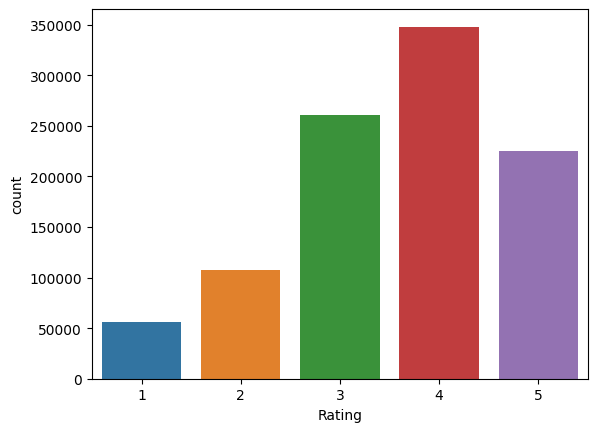

In [9]:
# Visualize Overall Ratings.
sns.countplot(x="Rating",data=final_data)

### Observation:
    Maximum user give rating as "4"

<AxesSubplot: xlabel='Rating', ylabel='count'>

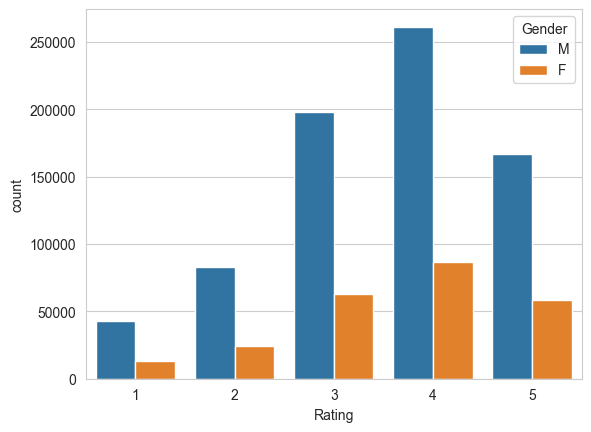

In [10]:
## Visualize Rating based on gender
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Gender',data=final_data)

### Observation:
    Male have given more ratings instead of female

<AxesSubplot: xlabel='Rating', ylabel='count'>

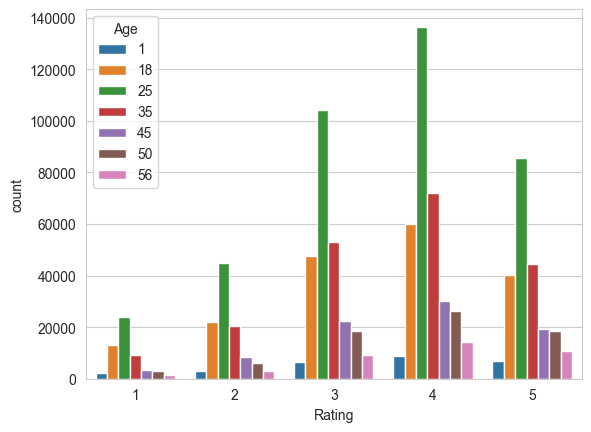

In [11]:
# Visualize Rating based on Age
sns.set_style('whitegrid')
sns.countplot(x="Rating",hue="Age",data=final_data,)

### Observation:
    User of Age-25 have given more ratings.

<AxesSubplot: xlabel='Rating', ylabel='count'>

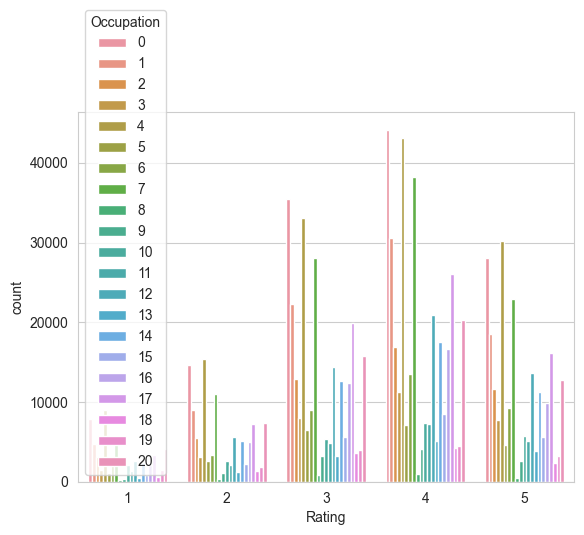

In [12]:
# Visualize Rating based on Occupation
sns.countplot(x="Rating",hue="Occupation",data=final_data)

<AxesSubplot: >

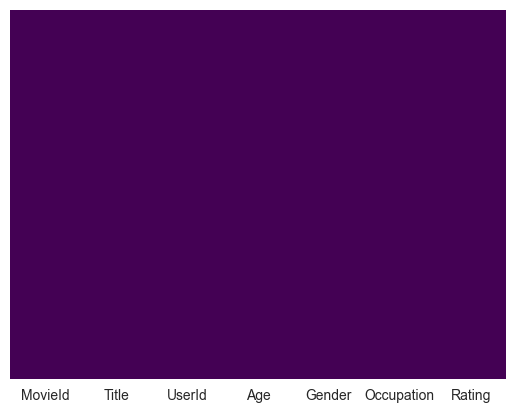

In [13]:
# Visualize any null values are there or not
sns.heatmap(final_data.isnull(),cbar=False,yticklabels=False, cmap='viridis')

<AxesSubplot: xlabel='Age', ylabel='Count'>

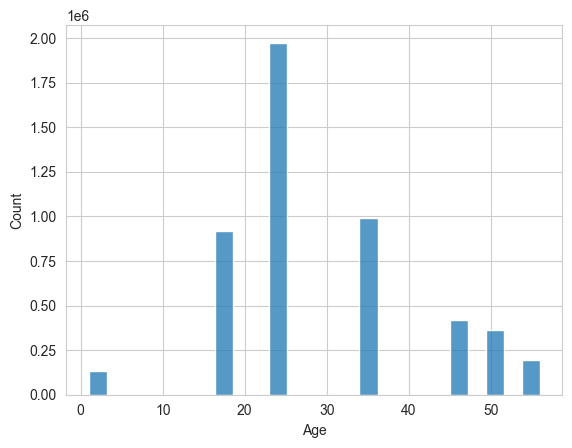

In [14]:
# Distribution of user age
sns.histplot(x="Age",data=final_data,weights=5,bins=25)

In [15]:
# Make the age groups based on age
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
final_data['age_group'] = pd.cut(final_data.Age, range(0, 81, 10), right=False, labels=labels)
final_data[['Age', 'age_group']].drop_duplicates()[:10]

Age age_group
0      56     50-59
129    25     20-29
180    45     40-49
399    50     50-59
469    35     30-39
1883   18     10-19
2187    1       0-9

<AxesSubplot: ylabel='Title'>

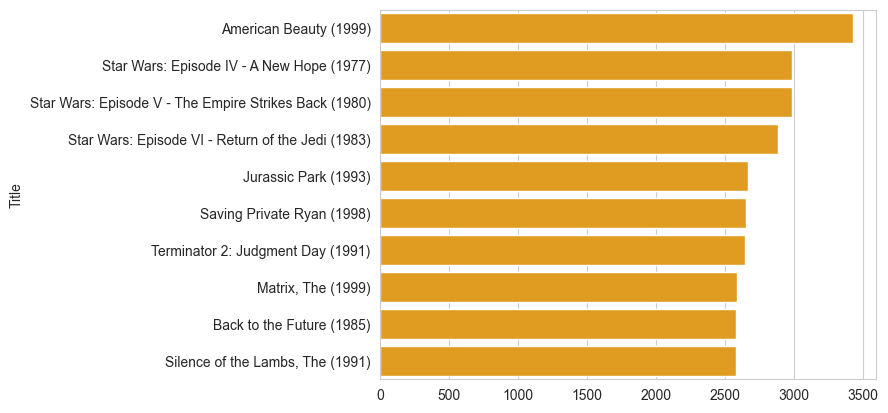

In [16]:
# Visualize Top 10 movies based on viewership...
movie_name=final_data["Title"].value_counts().head(10).index
movie_val=final_data["Title"].value_counts().head(10).values

sns.barplot(x=movie_val,y=movie_name,color="orange",data=final_data)

## Convert Categorical Data

In [17]:
# Handle feature -> Gender
gender=pd.get_dummies(final_data["Gender"],drop_first=True)
gender['M']=gender['M'].map({False:0,True:1})
gender

M
0       1
1       1
2       1
3       1
4       1
...    ..
998075  1
998076  1
998077  1
998078  1
998079  1

[998080 rows x 1 columns]

In [18]:
final_data.drop("Gender",axis=1,inplace=True)
final_data=pd.concat([final_data,gender],axis=1)
final_data.head()

MovieId                                     Title  UserId  Age  Occupation   
0     1357                              Shine (1996)       2   56          16  \
1     3068                       Verdict, The (1982)       2   56          16   
2     1537  Shall We Dance? (Shall We Dansu?) (1996)       2   56          16   
3      647                 Courage Under Fire (1996)       2   56          16   
4     2194                  Untouchables, The (1987)       2   56          16   

   Rating age_group  M  
0       5     50-59  1  
1       4     50-59  1  
2       4     50-59  1  
3       3     50-59  1  
4       4     50-59  1

In [19]:
x=final_data.drop(["Title","Rating","UserId","age_group"],axis=1).values
y=final_data["Rating"].values

## Now our Data is ready for training.

# Model Training


## Split the data

In [20]:
#Split the data for training and test purpose
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [21]:
## Logistic Regression Model

clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy : ",round(metrics.accuracy_score(y_test,y_pred)*100,4))

Accuracy :  34.9204


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
## Descision Tree
mod2=DecisionTreeClassifier()
mod2.fit(X_train,y_train)
y2_pred=mod2.predict(X_test)

print("Accuracy :",round(mod2.score(X_train,y_train)*100,2))

Accuracy : 60.95


# Thank You .